In [13]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('D:\\Menin\\excelcsv\\menin200more_1.csv')

# Convert SMILES to RDKit molecule objects
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)

# Calculate Morgan fingerprints for each molecule
df['Fingerprint'] = df['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))

# Calculate similarity matrix
num_molecules = len(df)
fingerprints = list(df['Fingerprint'])
similarity_matrix = np.zeros((num_molecules, num_molecules))

for i in range(num_molecules):
    for j in range(i + 1, num_molecules):
        similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# Convert similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Perform K-means clustering
num_clusters = 5  # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(distance_matrix)

# Assign clusters to the dataframe
df['Cluster'] = kmeans.labels_

# Find the representative molecule for each cluster
representative_molecules = []
for cluster in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_fingerprints = [fingerprints[i] for i in cluster_indices]
    
    # Calculate average similarity to the cluster center
    similarities = []
    for i in cluster_indices:
        similarity = np.mean([DataStructs.FingerprintSimilarity(fingerprints[i], fp) for fp in cluster_fingerprints])
        similarities.append(similarity)
    
    # Find the molecule with the highest average similarity
    representative_index = cluster_indices[np.argmax(similarities)]
    representative_molecules.append(df.iloc[representative_index]['Smiles'])

# Print the representative molecules for each cluster
for i, smi in enumerate(representative_molecules):
    print(f"Cluster {i+1} representative molecule: {smi}")

Cluster 1 representative molecule: COC(=O)N[C@H]1CCC[C@@H]1[C@](CN1CCC1)(c1cccc(F)c1)C1CCN(CC2CN(c3ccc(S(=O)(=O)C4CC4)cc3)C2)CC1
Cluster 2 representative molecule: CCc1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1
Cluster 3 representative molecule: N#Cc1ccc(N2CC(CN3CCC(C4(C5CCCC5)NCCc5ccccc54)CC3)C2)cc1
Cluster 4 representative molecule: N=C(N)NCCC[C@@H]1NC(=O)C2(CCC2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CCCCCCCCNC(=O)[C@@H]2CCCN2C1=O
Cluster 5 representative molecule: Cc1c(CN2CCC(Nc3ncnc4sc(CC(F)(F)F)cc34)CC2)ccc2c1cc(C#N)n2CCN1CCN(C)CC1


[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerator
[14:17:00] DEPRECATION WARNING: please use MorganGenerat

[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerator
[14:39:38] DEPRECATION WARNING: please use MorganGenerat

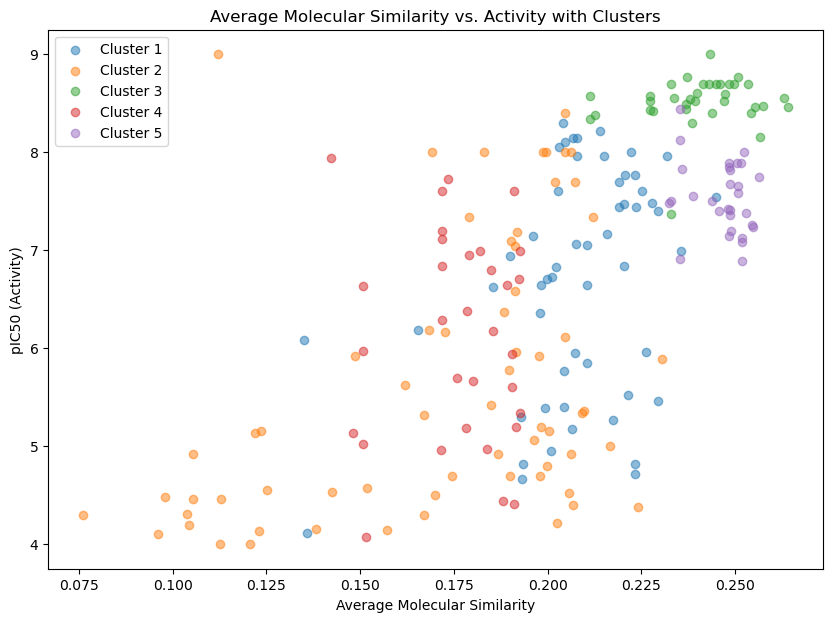

Cluster 1 representative molecule: N#Cc1ccc(N2CC(CN3CCC(C4(C5CCCC5)NCCc5ccccc54)CC3)C2)cc1
Cluster 2 representative molecule: CCc1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1
Cluster 3 representative molecule: COC(=O)N[C@H]1CCC[C@@H]1[C@](CN1CCC1)(c1cccc(F)c1)C1CCN(CC2CN(c3ccc(S(=O)(=O)C4CC4)cc3)C2)CC1
Cluster 4 representative molecule: N=C(N)NCCC[C@@H]1NC(=O)C2(CCC2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CCCCCCCCNC(=O)[C@@H]2CCCN2C1=O
Cluster 5 representative molecule: Cc1c(CN2CCC(Nc3ncnc4sc(CC(F)(F)F)cc34)CC2)ccc2c1cc(C#N)n2CCN1CCN(C)CC1


In [22]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('D:\\Menin\\excelcsv\\menin200more_1.csv')

# Convert SMILES to RDKit molecule objects
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)

# Calculate Morgan fingerprints for each molecule
df['Fingerprint'] = df['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))

# Calculate similarity matrix (if needed)
# This part can be omitted if similarity_matrix and distance_matrix are not needed for other purposes
num_molecules = len(df)
fingerprints = list(df['Fingerprint'])
similarity_matrix = np.zeros((num_molecules, num_molecules))

for i in range(num_molecules):
    for j in range(i + 1, num_molecules):
        similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# Convert similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Perform K-means clustering
num_clusters = 5  # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(distance_matrix)

# Assign clusters to the dataframe
df['Cluster'] = kmeans.labels_

# Calculate average similarity for each molecule (if needed)
# This part can be omitted if average similarity is not needed for other purposes
average_similarities = []

for i in range(num_molecules):
    similarities = []
    for j in range(num_molecules):
        if i != j:
            similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
            similarities.append(similarity)
    average_similarity = np.mean(similarities)
    average_similarities.append(average_similarity)

df['Average_Similarity'] = average_similarities

# Plot average similarity vs. activity with color-coded clusters
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_df = df[df['Cluster'] == cluster]
    plt.scatter(cluster_df['Average_Similarity'], cluster_df['pIC50'], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.title('Average Molecular Similarity vs. Activity with Clusters')
plt.xlabel('Average Molecular Similarity')
plt.ylabel('pIC50 (Activity)')
plt.legend()
plt.show()

# Find the representative molecule for each cluster (if needed)
representative_molecules = []
for cluster in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_fingerprints = [fingerprints[i] for i in cluster_indices]
    
    similarities = []
    for i in cluster_indices:
        similarity = np.mean([DataStructs.FingerprintSimilarity(fingerprints[i], fp) for fp in cluster_fingerprints])
        similarities.append(similarity)
    
    representative_index = cluster_indices[np.argmax(similarities)]
    representative_molecules.append(df.iloc[representative_index]['Smiles'])

# Print the representative molecules for each cluster
for i, smi in enumerate(representative_molecules):
    print(f"Cluster {i+1} representative molecule: {smi}")


[16:07:59] Initializing MetalDisconnector
[16:07:59] Running MetalDisconnector
[16:07:59] Initializing Normalizer
[16:07:59] Running Normalizer
[16:07:59] Running LargestFragmentChooser
[16:07:59] Running Uncharger
[16:07:59] Initializing MetalDisconnector
[16:07:59] Running MetalDisconnector
[16:07:59] Initializing Normalizer
[16:07:59] Running Normalizer
[16:07:59] Running LargestFragmentChooser
[16:07:59] Running Uncharger
[16:07:59] Initializing MetalDisconnector
[16:07:59] Running MetalDisconnector
[16:07:59] Initializing Normalizer
[16:07:59] Running Normalizer
[16:07:59] Running LargestFragmentChooser
[16:07:59] Running Uncharger
[16:07:59] Initializing MetalDisconnector
[16:07:59] Running MetalDisconnector
[16:07:59] Initializing Normalizer
[16:07:59] Running Normalizer
[16:07:59] Running LargestFragmentChooser
[16:07:59] Running Uncharger
[16:07:59] Initializing MetalDisconnector
[16:07:59] Running MetalDisconnector
[16:07:59] Initializing Normalizer
[16:07:59] Running Normali

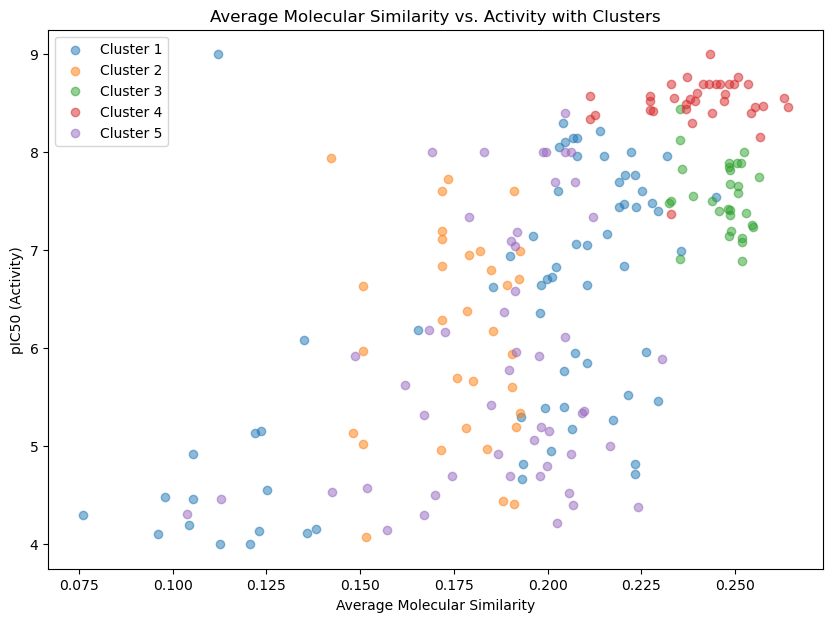

Cluster 1 representative molecule: N#Cc1ccc(N2CC(CN3CCC(C4(C5CCCC5)NCCc5ccccc54)CC3)C2)cc1
Cluster 2 representative molecule: N=C(N)NCCC[C@@H]1NC(=O)C2(CCC2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CCCCCCCCNC(=O)[C@@H]2CCCN2C1=O
Cluster 3 representative molecule: Cc1c(CN2CCC(Nc3ncnc4sc(CC(F)(F)F)cc34)CC2)ccc2c1cc(C#N)n2CCN1CCN(C)CC1
Cluster 4 representative molecule: COC(=O)N[C@H]1CCC[C@@H]1[C@](CN1CCC1)(c1cccc(F)c1)C1CCN(CC2CN(c3ccc(S(=O)(=O)C4CC4)cc3)C2)CC1
Cluster 5 representative molecule: CCc1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1


In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.MolStandardize import rdMolStandardize
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 化学结构标准化函数
def standardize_mol(mol):
    if mol is None:
        return None
    try:
        # 去除盐和溶剂
        mol = rdMolStandardize.FragmentParent(mol)
        # 中和电荷
        uncharger = rdMolStandardize.Uncharger()
        mol = uncharger.uncharge(mol)
        # 生成规范化的 SMILES
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        print(f"Standardization error: {e}")
        return None

# 加载 CSV 文件
df = pd.read_csv('D:\\Menin\\excelcsv\\menin200more_1.csv')

# 转换 SMILES 为 RDKit 分子对象
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)

# 标准化分子
df['Standardized_Smiles'] = df['Molecule'].apply(
    lambda x: standardize_mol(x) if x is not None else None
)

# 过滤掉标准化失败的分子
df = df.dropna(subset=['Standardized_Smiles'])

# 重新生成标准化后的分子对象
df['Molecule'] = df['Standardized_Smiles'].apply(Chem.MolFromSmiles)

# 计算 Morgan 指纹
df['Fingerprint'] = df['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))

# 计算相似度矩阵
num_molecules = len(df)
fingerprints = list(df['Fingerprint'])
similarity_matrix = np.zeros((num_molecules, num_molecules))

for i in range(num_molecules):
    for j in range(i + 1, num_molecules):
        similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# 将相似度矩阵转换为距离矩阵
distance_matrix = 1 - similarity_matrix

# 执行 K-means 聚类
num_clusters = 5  # 可以根据需要调整聚类数量
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(distance_matrix)

# 将聚类结果分配到 DataFrame
df['Cluster'] = kmeans.labels_

# 计算每个分子的平均相似度
average_similarities = []

for i in range(num_molecules):
    similarities = []
    for j in range(num_molecules):
        if i != j:
            similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
            similarities.append(similarity)
    average_similarity = np.mean(similarities)
    average_similarities.append(average_similarity)

df['Average_Similarity'] = average_similarities

# 绘制平均相似度与活性的关系图，并按聚类着色
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_df = df[df['Cluster'] == cluster]
    plt.scatter(cluster_df['Average_Similarity'], cluster_df['pIC50'], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.title('Average Molecular Similarity vs. Activity with Clusters')
plt.xlabel('Average Molecular Similarity')
plt.ylabel('pIC50 (Activity)')
plt.legend()
plt.show()

# 找到每个聚类的代表性分子
representative_molecules = []
for cluster in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_fingerprints = [fingerprints[i] for i in cluster_indices]
    
    similarities = []
    for i in cluster_indices:
        similarity = np.mean([DataStructs.FingerprintSimilarity(fingerprints[i], fp) for fp in cluster_fingerprints])
        similarities.append(similarity)
    
    representative_index = cluster_indices[np.argmax(similarities)]
    representative_molecules.append(df.iloc[representative_index]['Standardized_Smiles'])

# 打印每个聚类的代表性分子
for i, smi in enumerate(representative_molecules):
    print(f"Cluster {i+1} representative molecule: {smi}")

In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.MolStandardize import rdMolStandardize
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 化学结构标准化函数
def standardize_mol(mol):
    if mol is None:
        return None
    try:
        # 去除盐和溶剂
        mol = rdMolStandardize.FragmentParent(mol)
        # 中和电荷
        uncharger = rdMolStandardize.Uncharger()
        mol = uncharger.uncharge(mol)
        # 生成规范化的 SMILES
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        print(f"Standardization error: {e}")
        return None

# 加载 CSV 文件
df = pd.read_csv('D:\\Menin\\excelcsv\\menin200more_1.csv')

# ========== 新增标准化流程 ==========
# 转换 SMILES 为 RDKit 分子对象
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)

# 标准化分子并生成新列
df['Standardized_Smiles'] = df['Molecule'].apply(
    lambda x: standardize_mol(x) if x is not None else None
)

# 过滤标准化失败的分子
df_clean = df.dropna(subset=['Standardized_Smiles']).copy()

# 重新生成标准化后的分子对象
df_clean['Molecule'] = df_clean['Standardized_Smiles'].apply(Chem.MolFromSmiles)
# ================================

# 计算 Morgan 指纹
df_clean['Fingerprint'] = df_clean['Molecule'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048)
)

# 计算相似度矩阵
num_molecules = len(df_clean)
fingerprints = list(df_clean['Fingerprint'])
similarity_matrix = np.zeros((num_molecules, num_molecules))

for i in range(num_molecules):
    for j in range(i + 1, num_molecules):
        similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# 将相似度矩阵转换为距离矩阵
distance_matrix = 1 - similarity_matrix

# 执行 K-means 聚类
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(distance_matrix)

# 将聚类结果分配到 DataFrame
df_clean['Cluster'] = kmeans.labels_

# 计算平均相似度
average_similarities = []
for i in range(num_molecules):
    similarities = [
        DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        for j in range(num_molecules) if i != j
    ]
    average_similarities.append(np.mean(similarities))

df_clean['Average_Similarity'] = average_similarities

# ========== 输出新数据集 ==========
# 选择需要保留的列
output_columns = [
    'Smiles',           # 原始 SMILES
    'Standardized_Smiles',  # 标准化后的 SMILES
    'pIC50',            # 活性值
    'Cluster',          # 聚类标签
    'Average_Similarity' # 平均相似度
]

# 保存为新的 CSV 文件
output_path = 'D:\\Menin\\excelcsv\\menin200more_standardized.csv'
df_clean[output_columns].to_csv(output_path, index=False)

print(f"新数据集已保存至: {output_path}")
# ================================

# 后续可视化代码保持不变...

[16:26:52] Initializing MetalDisconnector
[16:26:52] Running MetalDisconnector
[16:26:52] Initializing Normalizer
[16:26:52] Running Normalizer
[16:26:52] Running LargestFragmentChooser
[16:26:52] Running Uncharger
[16:26:52] Initializing MetalDisconnector
[16:26:52] Running MetalDisconnector
[16:26:52] Initializing Normalizer
[16:26:52] Running Normalizer
[16:26:52] Running LargestFragmentChooser
[16:26:52] Running Uncharger
[16:26:52] Initializing MetalDisconnector
[16:26:52] Running MetalDisconnector
[16:26:52] Initializing Normalizer
[16:26:52] Running Normalizer
[16:26:52] Running LargestFragmentChooser
[16:26:52] Running Uncharger
[16:26:52] Initializing MetalDisconnector
[16:26:52] Running MetalDisconnector
[16:26:52] Initializing Normalizer
[16:26:52] Running Normalizer
[16:26:52] Running LargestFragmentChooser
[16:26:52] Running Uncharger
[16:26:52] Initializing MetalDisconnector
[16:26:52] Running MetalDisconnector
[16:26:52] Initializing Normalizer
[16:26:52] Running Normali

新数据集已保存至: D:\Menin\excelcsv\menin200more_standardized.csv


[20:59:28] Initializing MetalDisconnector
[20:59:28] Running MetalDisconnector
[20:59:28] Initializing Normalizer
[20:59:28] Running Normalizer
[20:59:28] Running LargestFragmentChooser
[20:59:28] Running Uncharger
[20:59:28] Initializing MetalDisconnector
[20:59:28] Running MetalDisconnector
[20:59:28] Initializing Normalizer
[20:59:28] Running Normalizer
[20:59:28] Running LargestFragmentChooser
[20:59:28] Running Uncharger
[20:59:28] Initializing MetalDisconnector
[20:59:28] Running MetalDisconnector
[20:59:28] Initializing Normalizer
[20:59:28] Running Normalizer
[20:59:28] Running LargestFragmentChooser
[20:59:28] Running Uncharger
[20:59:28] Initializing MetalDisconnector
[20:59:28] Running MetalDisconnector
[20:59:28] Initializing Normalizer
[20:59:28] Running Normalizer
[20:59:28] Running LargestFragmentChooser
[20:59:28] Running Uncharger
[20:59:28] Initializing MetalDisconnector
[20:59:28] Running MetalDisconnector
[20:59:28] Initializing Normalizer
[20:59:28] Running Normali

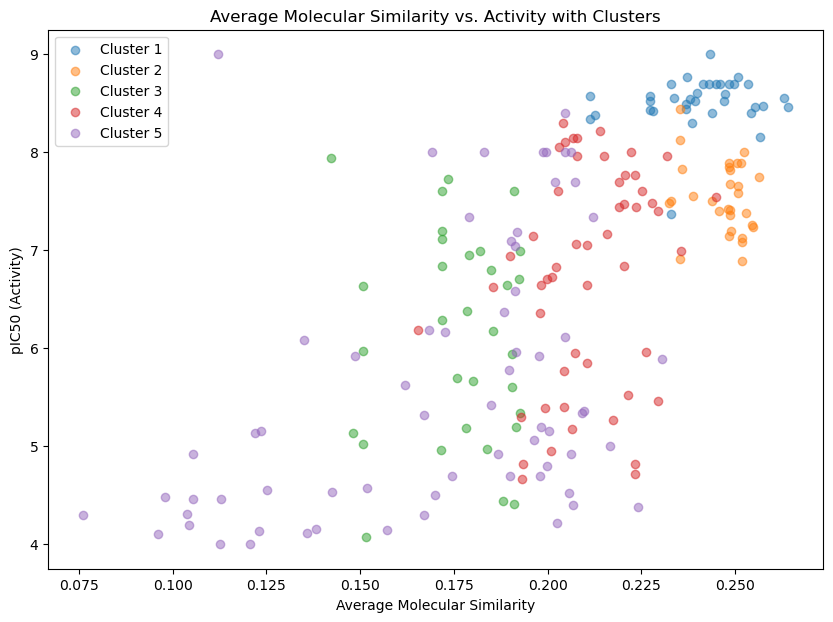

Cluster 1 representative molecule: COC(=O)N[C@H]1CCC[C@@H]1[C@](CN1CCC1)(c1cccc(F)c1)C1CCN(CC2CN(c3ccc(S(=O)(=O)C4CC4)cc3)C2)CC1
Cluster 2 representative molecule: Cc1c(CN2CCC(Nc3ncnc4sc(CC(F)(F)F)cc34)CC2)ccc2c1cc(C#N)n2CCN1CCN(C)CC1
Cluster 3 representative molecule: N=C(N)NCCC[C@@H]1NC(=O)C2(CCC2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CCCCCCCCNC(=O)[C@@H]2CCCN2C1=O
Cluster 4 representative molecule: N#Cc1ccc(N2CC(CN3CCC(C4(C5CCCC5)NCCc5ccccc54)CC3)C2)cc1
Cluster 5 representative molecule: CCc1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1


In [14]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.MolStandardize import rdMolStandardize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import numpy as np
import matplotlib.pyplot as plt

# 化学结构标准化函数
def standardize_mol(mol):
    if mol is None:
        return None
    try:
        # 去除盐和溶剂
        mol = rdMolStandardize.FragmentParent(mol)
        # 中和电荷
        uncharger = rdMolStandardize.Uncharger()
        mol = uncharger.uncharge(mol)
        # 生成规范化的 SMILES
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        print(f"Standardization error: {e}")
        return None

# 加载 CSV 文件
df = pd.read_csv('D:\\Menin\\excelcsv\\menin200more_1.csv')

# 转换 SMILES 为 RDKit 分子对象
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)

# 标准化分子
df['Standardized_Smiles'] = df['Molecule'].apply(
    lambda x: standardize_mol(x) if x is not None else None
)

# 过滤掉标准化失败的分子
df = df.dropna(subset=['Standardized_Smiles'])

# 重新生成标准化后的分子对象
df['Molecule'] = df['Standardized_Smiles'].apply(Chem.MolFromSmiles)

# 计算 Morgan 指纹
df['Fingerprint'] = df['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))

# 计算相似度矩阵
num_molecules = len(df)
fingerprints = list(df['Fingerprint'])
similarity_matrix = np.zeros((num_molecules, num_molecules))

for i in range(num_molecules):
    for j in range(i + 1, num_molecules):
        similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# 将相似度矩阵转换为距离矩阵
distance_matrix = 1 - similarity_matrix

# 执行层次聚类
Z = linkage(distance_matrix, method='ward')  # 使用Ward方法进行层次聚类

# 根据距离阈值或簇数划分聚类
num_clusters = 5  # 可以根据需要调整聚类数量
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')

# 将聚类结果分配到 DataFrame
df['Cluster'] = clusters - 1  # fcluster的簇编号从1开始，调整为从0开始

# 计算每个分子的平均相似度
average_similarities = []

for i in range(num_molecules):
    similarities = []
    for j in range(num_molecules):
        if i != j:
            similarity = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
            similarities.append(similarity)
    average_similarity = np.mean(similarities)
    average_similarities.append(average_similarity)

df['Average_Similarity'] = average_similarities

# 绘制平均相似度与活性的关系图，并按聚类着色
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_df = df[df['Cluster'] == cluster]
    plt.scatter(cluster_df['Average_Similarity'], cluster_df['pIC50'], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.title('Average Molecular Similarity vs. Activity with Clusters')
plt.xlabel('Average Molecular Similarity')
plt.ylabel('pIC50 (Activity)')
plt.legend()
plt.show()

# 找到每个聚类的代表性分子
representative_molecules = []
for cluster in range(num_clusters):
    cluster_indices = np.where(df['Cluster'] == cluster)[0]
    cluster_fingerprints = [fingerprints[i] for i in cluster_indices]
    
    similarities = []
    for i in cluster_indices:
        similarity = np.mean([DataStructs.FingerprintSimilarity(fingerprints[i], fp) for fp in cluster_fingerprints])
        similarities.append(similarity)
    
    representative_index = cluster_indices[np.argmax(similarities)]
    representative_molecules.append(df.iloc[representative_index]['Standardized_Smiles'])

# 打印每个聚类的代表性分子
for i, smi in enumerate(representative_molecules):
    print(f"Cluster {i+1} representative molecule: {smi}")


[14:51:04] Initializing MetalDisconnector
[14:51:04] Running MetalDisconnector
[14:51:04] Initializing Normalizer
[14:51:04] Running Normalizer
[14:51:04] Running LargestFragmentChooser
[14:51:04] Running Uncharger
[14:51:04] Initializing MetalDisconnector
[14:51:04] Running MetalDisconnector
[14:51:04] Initializing Normalizer
[14:51:04] Running Normalizer
[14:51:04] Running LargestFragmentChooser
[14:51:04] Running Uncharger
[14:51:04] Initializing MetalDisconnector
[14:51:04] Running MetalDisconnector
[14:51:04] Initializing Normalizer
[14:51:04] Running Normalizer
[14:51:04] Running LargestFragmentChooser
[14:51:04] Running Uncharger
[14:51:04] Initializing MetalDisconnector
[14:51:04] Running MetalDisconnector
[14:51:04] Initializing Normalizer
[14:51:04] Running Normalizer
[14:51:04] Running LargestFragmentChooser
[14:51:04] Running Uncharger
[14:51:04] Initializing MetalDisconnector
[14:51:04] Running MetalDisconnector
[14:51:04] Initializing Normalizer
[14:51:04] Running Normali


Silhouette Coefficient: 0.322

Cluster Similarity Statistics:
 Cluster  Size  Mean Similarity  Std Similarity  Min Similarity  Max Similarity
       1    30            0.763           0.075           0.588           1.000
       2    66            0.254           0.181           0.033           0.938
       3    32            0.554           0.240           0.179           1.000
       4    35            0.692           0.118           0.400           1.000
       5    52            0.383           0.207           0.109           1.000


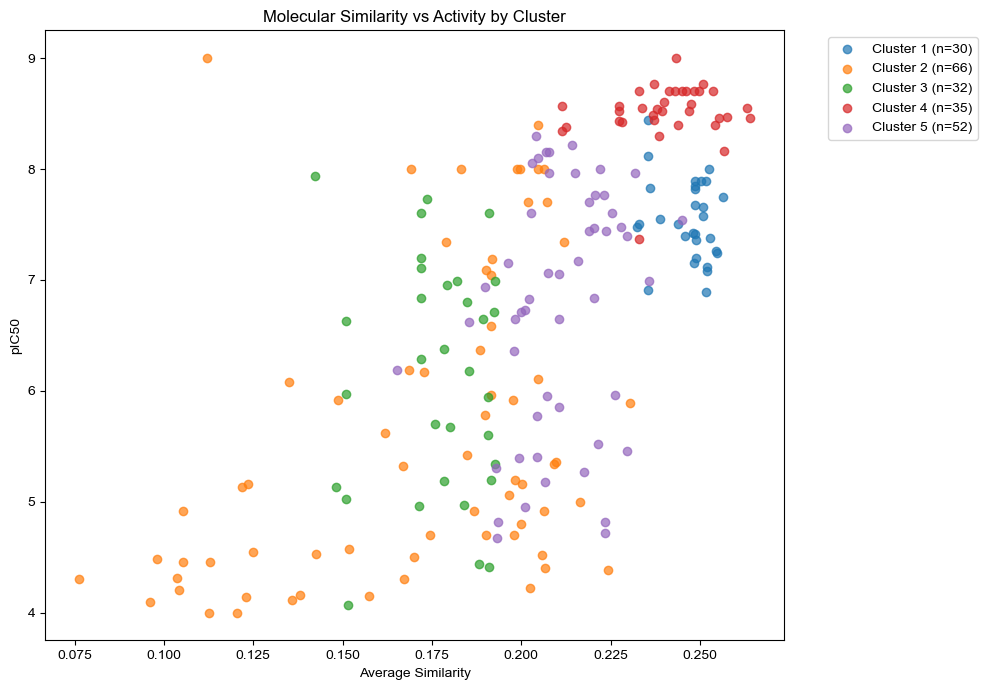

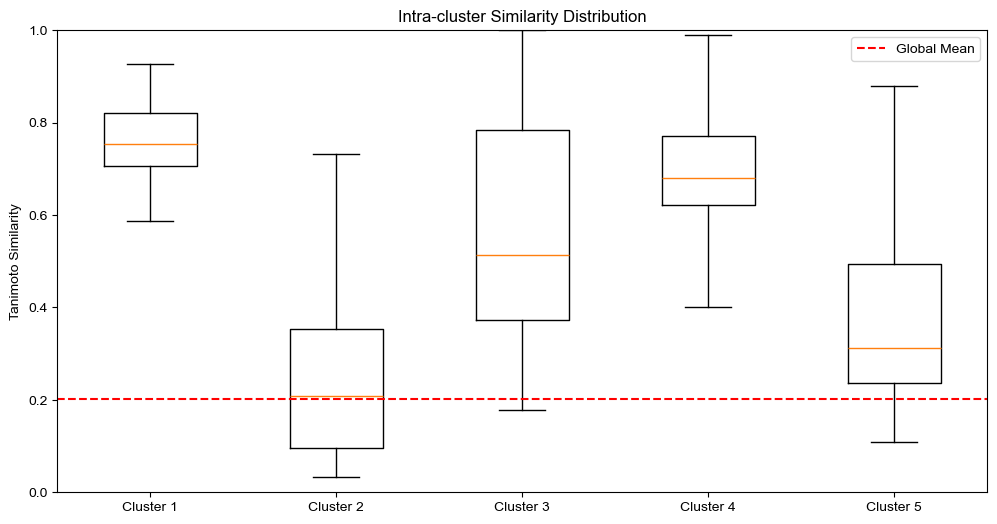


Representative Molecules:
Cluster 1: Cc1c(CN2CCC(Nc3ncnc4sc(CC(F)(F)F)cc34)CC2)ccc2c1cc(C#N)n2CCN1CCN(C)CC1
Cluster 2: CCc1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1
Cluster 3: N=C(N)NCCC[C@@H]1NC(=O)C2(CCC2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CCCCCCCCNC(=O)[C@@H]2CCCN2C1=O
Cluster 4: COC(=O)N[C@H]1CCC[C@@H]1[C@](CN1CCC1)(c1cccc(F)c1)C1CCN(CC2CN(c3ccc(S(=O)(=O)C4CC4)cc3)C2)CC1
Cluster 5: N#Cc1ccc(N2CC(CN3CCC(C4(C5CCCC5)NCCc5ccccc54)CC3)C2)cc1


In [21]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.MolStandardize import rdMolStandardize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform

# 化学结构标准化函数
def standardize_mol(mol):
    if mol is None:
        return None
    try:
        mol = rdMolStandardize.FragmentParent(mol)
        uncharger = rdMolStandardize.Uncharger()
        mol = uncharger.uncharge(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        print(f"Standardization error: {e}")
        return None

# 加载 CSV 文件
df = pd.read_csv('D:\\Menin\\excelcsv\\menin200more.csv')

# 转换和预处理分子
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)
df['Standardized_Smiles'] = df['Molecule'].apply(
    lambda x: standardize_mol(x) if x is not None else None)
df = df.dropna(subset=['Standardized_Smiles'])
df['Molecule'] = df['Standardized_Smiles'].apply(Chem.MolFromSmiles)

# 计算Morgan指纹
df['Fingerprint'] = df['Molecule'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))

# 构建相似度矩阵
num_molecules = len(df)
fingerprints = list(df['Fingerprint'])
similarity_matrix = np.zeros((num_molecules, num_molecules))

for i in range(num_molecules):
    for j in range(i + 1, num_molecules):
        sim = DataStructs.FingerprintSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim
np.fill_diagonal(similarity_matrix, 1.0) 
distance_matrix = 1 - similarity_matrix

# ====== 新增代码段：计算每个分子的平均相似度 ======
average_sims = []
for i in range(len(similarity_matrix)):
    mask = np.ones(len(similarity_matrix), dtype=bool)
    mask[i] = False  # 排除自相似度
    average_sims.append(np.mean(similarity_matrix[i, mask]))

df['Average_Similarity'] = average_sims
# ====== 新增代码结束 ======

# 层次聚类
Z = linkage(squareform(distance_matrix), method='ward')
num_clusters = 5
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
df['Cluster'] = clusters - 1

# ========== 修正的评估部分 ==========
try:
    if len(np.unique(df['Cluster'])) > 1:
        # 关键修正：直接使用原始距离矩阵，不再二次压缩
        silhouette_avg = silhouette_score(distance_matrix, df['Cluster'], 
                                        metric="precomputed")
        print(f"\nSilhouette Coefficient: {silhouette_avg:.3f}")
    else:
        print("\nWarning: All molecules in one cluster, cannot compute Silhouette Coefficient")
except ValueError as e:
    print(f"\nSilhouette Coefficient calculation failed: {str(e)}")

# 簇内相似度统计（优化版）
cluster_stats = []
for c in range(num_clusters):
    cluster_members = df[df['Cluster'] == c]
    indices = cluster_members.index
    
    stats = {
        "Cluster": c+1,
        "Size": len(indices),
        "Mean Similarity": np.nan,
        "Std Similarity": np.nan,
        "Min Similarity": np.nan,
        "Max Similarity": np.nan
    }
    
    if len(indices) > 1:
        sub_sim = similarity_matrix[np.ix_(indices, indices)]
        triu = np.triu_indices_from(sub_sim, k=1)
        sim_values = sub_sim[triu]
        
        stats.update({
            "Mean Similarity": sim_values.mean(),
            "Std Similarity": sim_values.std(),
            "Min Similarity": sim_values.min(),
            "Max Similarity": sim_values.max()
        })
    
    cluster_stats.append(stats)

cluster_stats_df = pd.DataFrame(cluster_stats)
print("\nCluster Similarity Statistics:")
print(cluster_stats_df.to_string(index=False, float_format="%.3f"))

# ========== 可视化部分 ==========
# 平均相似度与活性关系图（优化标签显示）
plt.figure(figsize=(10, 7))
for c in range(num_clusters):
    subset = df[df['Cluster'] == c]
    if not subset.empty:
        plt.scatter(subset['Average_Similarity'], subset['pIC50'], 
                   label=f'Cluster {c+1} (n={len(subset)})', alpha=0.7)
plt.title('Molecular Similarity vs Activity by Cluster')
plt.xlabel('Average Similarity')
plt.ylabel('pIC50')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 簇内相似度箱线图（优化异常值处理）
plt.figure(figsize=(12, 6))
sim_data = []
for c in range(num_clusters):
    indices = df[df['Cluster'] == c].index
    if len(indices) > 1:
        triu = np.triu_indices_from(similarity_matrix[np.ix_(indices, indices)], k=1)
        sim_values = similarity_matrix[np.ix_(indices, indices)][triu]
        sim_data.append(sim_values[~np.isnan(sim_values)])

plt.boxplot(sim_data, 
           labels=[f'Cluster {i+1}' for i in range(num_clusters) if len(sim_data[i])>1],
           showfliers=False)  # 隐藏异常值
plt.axhline(y=np.nanmean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]), 
           color='r', linestyle='--', label='Global Mean')
plt.title('Intra-cluster Similarity Distribution')
plt.ylabel('Tanimoto Similarity')
plt.ylim(0, 1)
plt.legend()
plt.show()

# 代表性分子选择（优化质心计算）
representatives = []
for c in range(num_clusters):
    cluster_df = df[df['Cluster'] == c]
    if not cluster_df.empty:
        indices = cluster_df.index
        # 计算到所有其他分子的平均距离
        avg_distances = np.mean(distance_matrix[indices][:, indices], axis=1)
        centroid_idx = indices[np.argmin(avg_distances)]
        representatives.append(cluster_df.loc[centroid_idx, 'Standardized_Smiles'])

print("\nRepresentative Molecules:")
for i, smi in enumerate(representatives):
    print(f"Cluster {i+1}: {smi}")
